In [1]:
%matplotlib inline
%matplotlib notebook
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [163]:
#Disable auto scrolling

In [164]:

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Load and prepare data
array_reloaded = np.load("../VertexAndTracksCollection_n10_p200.npz")
tracks = array_reloaded["trackCollection"]#[:1000]
vertices = array_reloaded["vertexCollection"]#[:1000]

In [20]:
# Debug print outs
eventIdx = 9
print("Event {} with {} tracks and {} vertices.".format(eventIdx,tracks[eventIdx].shape[0],vertices[eventIdx].shape[0]))

Event 9 with 2767 tracks and 219 vertices.


Event 9 with 2767 tracks and 219 vertices.


<IPython.core.display.Javascript object>


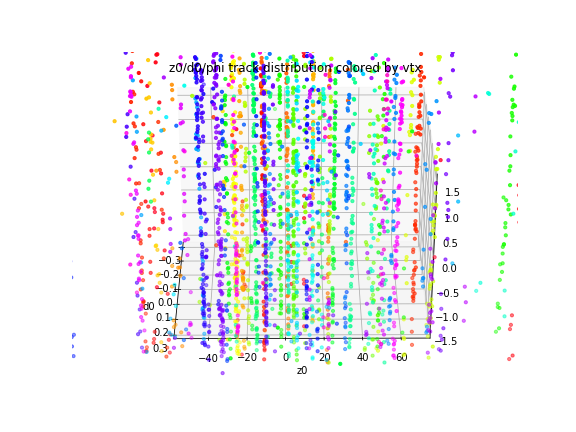

<IPython.core.display.Javascript object>


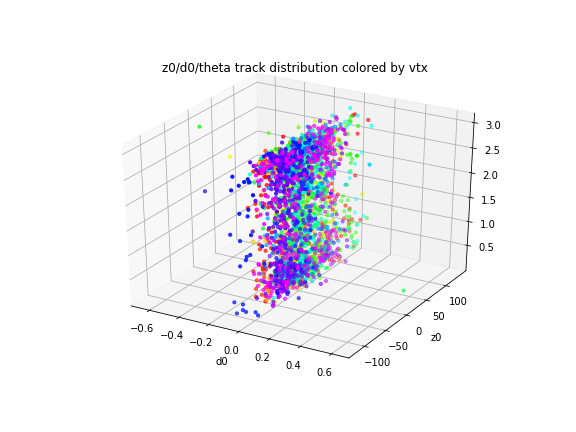

<IPython.core.display.Javascript object>


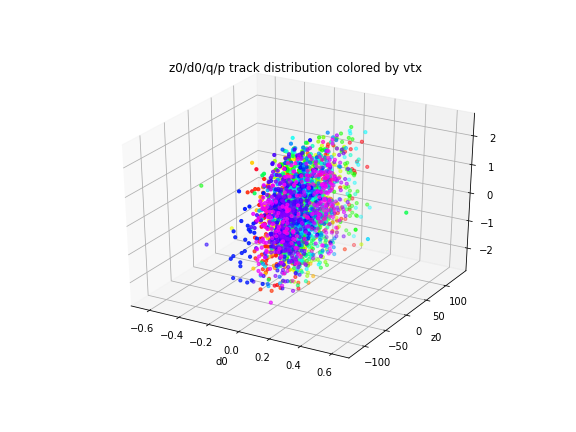

<IPython.core.display.Javascript object>


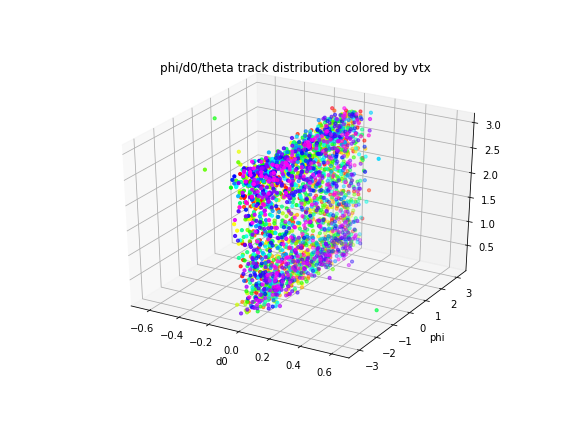

<IPython.core.display.Javascript object>


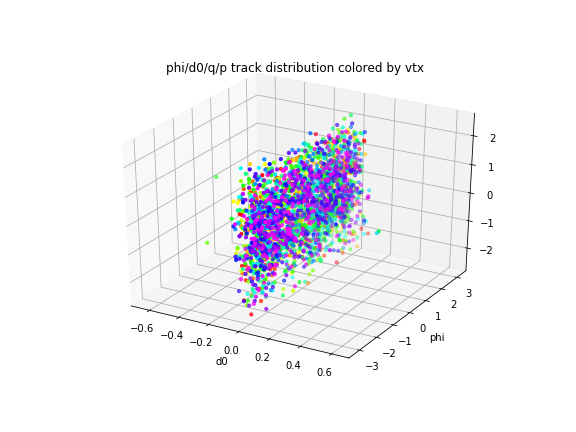

<IPython.core.display.Javascript object>


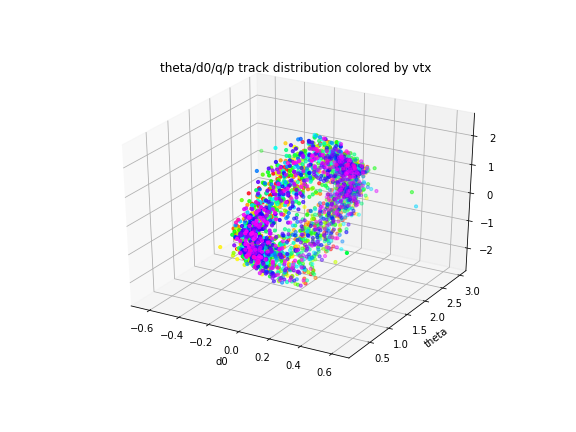

<IPython.core.display.Javascript object>


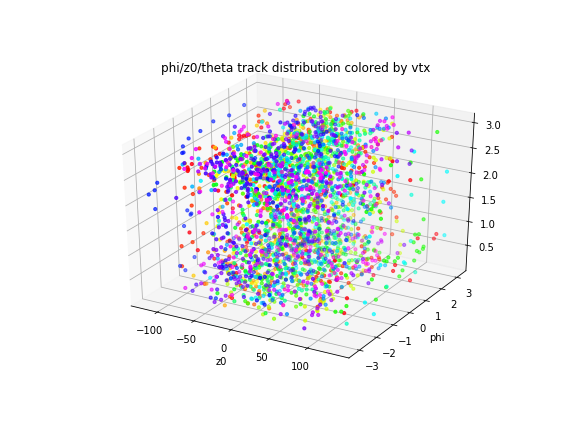

<IPython.core.display.Javascript object>


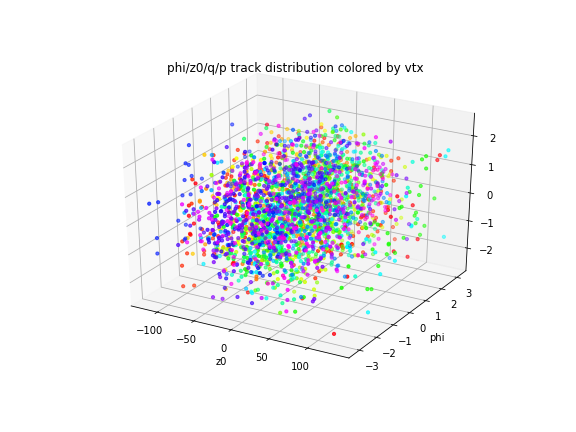

<IPython.core.display.Javascript object>


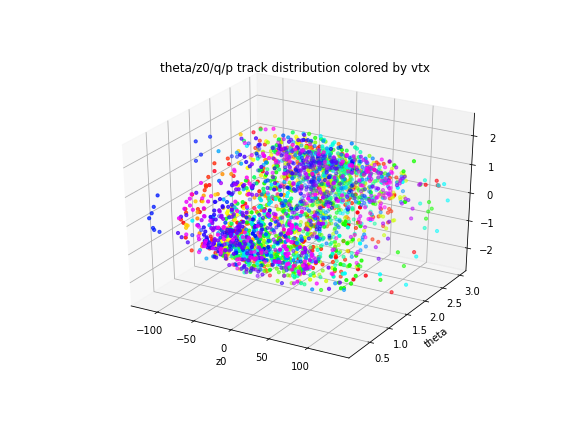

<IPython.core.display.Javascript object>


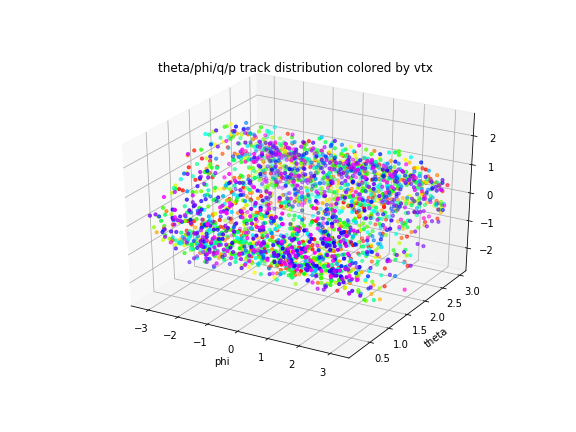

In [22]:
for eventIdx in range(9,10):
    print("Event {} with {} tracks and {} vertices.".format(eventIdx,tracks[eventIdx].shape[0],vertices[eventIdx].shape[0]))
    evTrks = tracks[eventIdx]
    labels = ["d0", "z0", "phi", "theta", "q/p", "vtxIdx"]
    d0z0s = evTrks #d0, z0, phi, theta, q/p, vtxIdx
    
    for i in range(len(labels) - 1):
        for j in range(i+1, len(labels) - 1):
            for k in range(j+1, len(labels) - 1):
                xidx = i #+ offset
                yidx = j #+ offset
                zidx = k

                xlabel = labels[xidx]
                ylabel = labels[yidx]
                zlabel = labels[zidx]

                fig = plt.figure(figsize=(8, 6))
                ax = fig.add_subplot(111, projection='3d')
                ax.scatter(d0z0s[:,xidx], d0z0s[:,yidx], d0z0s[:,zidx],  c=d0z0s[:,-1],  cmap="gist_rainbow", s=10)

                plt.title('{}/{}/{} track distribution colored by vtx'.format(ylabel, xlabel, zlabel))
                plt.xlabel(xlabel)
                plt.ylabel(ylabel)
                #plt.zlabel(zlabel)
                plt.show()

In [ ]:
granularityEta = 0.1
granularityPhi = 2*np.pi/64
# calculate corresponding bin numbers
binEta = round((rnEta + genRangeEta/2) / granularityEta) + etaJetGenOff
binPhi = round((rnPhi + genRangePhi/2) / granularityPhi) + phiJetGenOff